<a href="https://colab.research.google.com/github/Yidunchibubao/pandas-exercises-review/blob/main/pandasexer02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path

import pandas as pd

In [3]:
if not Path("cast.csv").is_file():
  !curl -L https//bit.ly/4cxYFd6 -o cast.csv
  !curl -L https://bit.ly/499D2wP -o movies.csv

In [4]:
!curl -L https://bit.ly/4cxYFd6 -o cast.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   116  100   116    0     0    684      0 --:--:-- --:--:-- --:--:--   686
100   162  100   162    0     0    230      0 --:--:-- --:--:-- --:--:--   230
100  156M  100  156M    0     0  18.3M      0  0:00:08  0:00:08 --:--:-- 23.4M


In [5]:
cast = pd.read_csv("cast.csv")
movies = pd.read_csv("movies.csv")

In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
movies.head()

,title,year
0,Cheoljomang,1960
1,Mayajalam,1998
2,Jerusalem,2003
3,Anthuleni Katha,1976
4,El cerco,1959


In [8]:
# 1. How many movies have the title “Hamlet”?
movies[movies["title"] == "Hamlet"].shape[0]

20

In [9]:
# 2. What are the earliest/latest two films listed in the movies.csv file?
movies.sort_values(by="year").head(2)

,title,year
237862,Miss Jerry,1894
69961,The Startled Lover,1898


In [10]:
movies.sort_values(by="year").tail(2)

,title,year
221962,The Zero Century: Maetel,2026
33654,100 Years,2115


In [11]:
# put everything in a single `DataFrame`(see the “DataFrame merging” chapter)
pd.concat([movies.sort_values(by="year").tail(2),
           movies.sort_values(by="year").head(2)])

,title,year
221962,The Zero Century: Maetel,2026
33654,100 Years,2115
237862,Miss Jerry,1894
69961,The Startled Lover,1898


In [12]:
# 3. List all of the “Treasure Island” movies from earliest to most recent.
movies[movies["title"] == "Treasure Island"].sort_values(by="year", ascending=True)

,title,year
92837,Treasure Island,1918
110254,Treasure Island,1920
91235,Treasure Island,1934
239429,Treasure Island,1950
188828,Treasure Island,1972
100165,Treasure Island,1973
209124,Treasure Island,1985
241322,Treasure Island,1999


In [13]:
# 4. How many movies were made from 1950 through 1959?
movies[(movies['year'] >= 1950) & (movies['year'] <= 1959)].shape[0]

12934

In [14]:
# 5. How many roles in the movie “Inception” are NOT ranked by an “n” value?
cast[(cast['title'] == 'Inception') & (~cast['n'].isna())].shape[0]

37

In [15]:
# 6. Display the cast of the “Titanic” (the most famous 1997 one) in their correct “n”-value order, ignoring roles that did not earn a numeric n value.
cast[(cast['title'] == 'Titanic') & (cast['year'] == 1997) & (~cast['n'].isna())].sort_values(by='n')

,title,year,name,type,character,n
590596,Titanic,1997,Leonardo DiCaprio,actor,Jack Dawson,1.0
2514391,Titanic,1997,Billy Zane,actor,Cal Hockley,3.0
2609960,Titanic,1997,Kathy Bates,actress,Molly Brown,4.0
1763447,Titanic,1997,Bill Paxton,actor,Brock Lovett,7.0
997604,Titanic,1997,Bernard Hill,actor,Captain Smith,8.0
...,...,...,...,...,...,...
957117,Titanic,1997,Lorenz Hasler,actor,I Salonisti Violin,105.0
782046,Titanic,1997,Thomas F?ri,actor,I Salonisti Violin,106.0
2221876,Titanic,1997,Ferenc Szedl?k,actor,I Salonisti Cello,107.0
2221875,Titanic,1997,B?la Szedl?k,actor,I Salonisti Double Bass,108.0


In [16]:
# 7. List the supporting roles (having n=2) played by Brad Pitt in the 1990s, ordered by year.
cast[(cast["name"] == "Brad Pitt") & (cast["n"] == 2.0) & (cast["year"].between(1990,1999))].sort_values(by="year")

,title,year,name,type,character,n
1808796,Across the Tracks,1990,Brad Pitt,actor,Joe Maloney,2.0
1808794,A River Runs Through It,1992,Brad Pitt,actor,Paul Maclean,2.0
1808839,The Dark Side of the Sun,1997,Brad Pitt,actor,Rick,2.0
1808840,The Devil's Own,1997,Brad Pitt,actor,Rory Devaney,2.0
1808841,The Devil's Own,1997,Brad Pitt,actor,Francis Austin McGuire,2.0
1808806,Fight Club,1999,Brad Pitt,actor,Tyler Durden,2.0


In [17]:
# 8. Using groupby, plot the number of films that have been released each decade in the history of cinema
def get_decade(year):
  return int(year / 10)

<Axes: xlabel='year'>

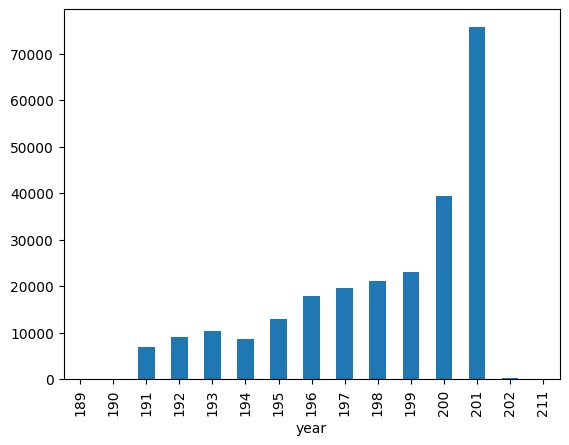

In [18]:
movies.groupby(movies["year"].apply(get_decade)).size().plot(kind="bar")

<Axes: xlabel='year'>

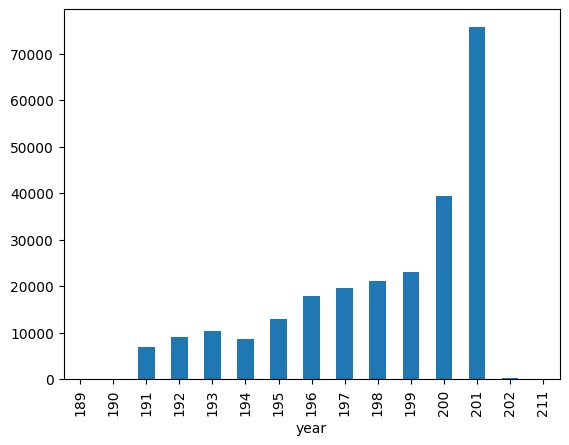

In [19]:
movies["year"].apply(get_decade).value_counts().sort_index().plot(kind="bar")

In [23]:
# 9. List the 10 actors and the 10 actresses that have the most leading roles (n = 1) since the 1990’s
cast[(cast["type"] == "actor") & (cast["n"] == 1) & (cast["year"] >= 1990)].groupby("name").size().sort_values(ascending=False).head(10)

,0
name,
Mohanlal,141
Mammootty,130
Akshay Kumar,97
Jayaram,81
Ajay Devgn,77
Andy Lau,73
Dileep (III),72
Amitabh Bachchan,70
Eric Roberts,67


In [24]:
cast[(cast["type"] == "actress") & (cast["n"] == 1) & (cast["year"] >= 1990)].groupby("name").size().sort_values(ascending=False).head(10)

,0
name,
Sharon Cuneta,27
Sandra Bullock,21
Maggie Cheung,21
Juliette Binoche,20
Nora Aunor,18
Margherita Buy,18
Pen?lope Cruz,17
Kate Beckinsale,16
Shabana Azmi,15


In [25]:
cast[(cast["type"] == "actor") & (cast["n"] == 1) & (cast["year"] >= 1990)].groupby("name").size().nlargest(10)

,0
name,
Mohanlal,141
Mammootty,130
Akshay Kumar,97
Jayaram,81
Ajay Devgn,77
Andy Lau,73
Dileep (III),72
Amitabh Bachchan,70
Eric Roberts,67


In [26]:
# 10. How many leading (n = 1) roles were available to actors, and how many to actresses, in each year of the 1950s?
cast[(cast["year"].between(1950,1959)) & (cast["n"] == 1)].groupby(["year", "type"]).size()

year  type   
1950  actor      625
      actress     47
1951  actor      651
      actress     63
1952  actor      613
      actress     68
1953  actor      664
      actress     55
1954  actor      636
      actress     61
1955  actor      648
      actress     54
1956  actor      668
      actress     61
1957  actor      739
      actress     60
1958  actor      715
      actress     63
1959  actor      733
      actress     63
dtype: int64

In [27]:
# 11. What are the 11 most common character names in movie history?
cast.groupby("character").size().nlargest(11)

,0
character,
Himself,20719
Extra,7864
Policeman,7019
Doctor,6995
Reporter,6754
Dancer,6413
Bartender,6062
Townsman,5873
Waiter,5389


<Axes: xlabel='year'>

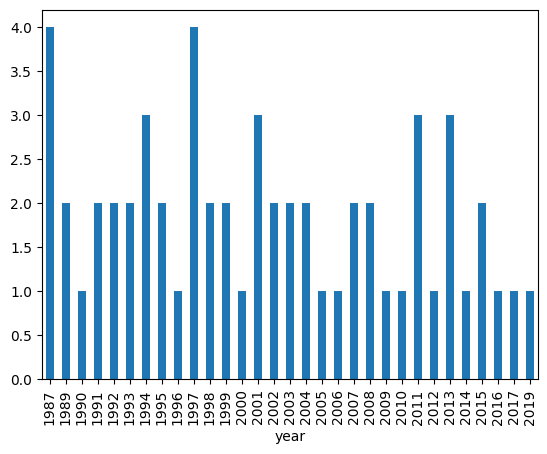

In [28]:
# 12. Plot how many roles Brad Pitt has played in each year of his career.
cast[(cast["name"] == "Brad Pitt")].groupby("year").size().plot(kind="bar")

In [30]:
# 13. List, in order by year, each of the movies in which “Frank Oz” has played more than 1 role.
df = cast[(cast["name"] == "Frank Oz")].groupby("title", as_index=False).size()
df[df["size"] > 1]

,title,size
0,An American Werewolf in London,2
2,Follow That Bird,3
7,Muppet Treasure Island,4
8,Muppets from Space,4
18,The Adventures of Elmo in Grouchland,3
20,The Dark Crystal,2
22,The Great Muppet Caper,6
23,The Muppet Christmas Carol,7
24,The Muppet Movie,8
25,The Muppets Take Manhattan,7


In [32]:
cast[cast["name"] == "Frank Oz"].sort_values(by="year").groupby("title", as_index=False).size().query("size > 1")

,title,size
0,An American Werewolf in London,2
2,Follow That Bird,3
7,Muppet Treasure Island,4
8,Muppets from Space,4
18,The Adventures of Elmo in Grouchland,3
20,The Dark Crystal,2
22,The Great Muppet Caper,6
23,The Muppet Christmas Carol,7
24,The Muppet Movie,8
25,The Muppets Take Manhattan,7


In [34]:
# 14. List each of the characters that Frank Oz has portrayed at least twice.
cast[cast["name"] == "Frank Oz"].groupby("character", as_index=False).size().query("size > 1")

,character,size
0,Animal,6
2,Bert,3
5,Cookie Monster,5
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,6
